In [109]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np

import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Setting a random seed for reproducibility
np.random.seed(3)


def plot_line_graph(df, x, y, hue=None):
    plt.figure(figsize=(15, 10))
    sns.lineplot(
        x=x, y=y, data=df, marker="o", hue=hue, palette="hot", legend="brief",
    )

    plt.title("Line Plot " + x + " vs " + y, fontsize=20)  # for title
    plt.xlabel(x, fontsize=15)  # label for x-axis
    plt.ylabel(y, fontsize=15)  # label for y-axis

    plt.show()


# plot_line_graph(df3, "X", "Y", "type")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [104]:
"""
df = pd.DataFrame()
df2 = pd.DataFrame()

sizeCount = 50
randLimit = 50

xlist = np.random.randint(randLimit, size=sizeCount)
ylist = xlist * 2
ylist2 = xlist * 3


df["X"] = xlist
df["Y"] = ylist
df["type"] = ["Times 2" for i in range(0, sizeCount)]

df2["X"] = xlist
df2["Y"] = ylist2
df2["type"] = ["Times 3" for i in range(0, sizeCount)]

df3 = pd.concat([df, df2])
df3.sample(20)

"""

cData = pd.read_csv("auto-mpg.csv")  
cData.shape





(398, 9)

<IPython.core.display.Javascript object>

In [105]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<IPython.core.display.Javascript object>

In [107]:
# dropping/ignoring car_name
cData = cData.drop("car name", axis=1)
# Also replacing the categorical var with actual values


KeyError: "['car name'] not found in axis"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
cData = pd.get_dummies(cData, columns=["origin"])
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


<IPython.core.display.Javascript object>

In [69]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [112]:
# build x and y data frame
"""
X = df.drop(["Y","type"], axis=1)
y = df["Y"]
"""

cData = cData.replace("?", np.nan)


medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller, axis=0)

cData["horsepower"] = cData["horsepower"].astype("float64")

cData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

<IPython.core.display.Javascript object>

In [113]:
X = cData.drop(["mpg"], axis=1)
# the dependent variable
y = cData[["mpg"]]

# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [114]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 278
Number of rows in test data = 120


<IPython.core.display.Javascript object>

In [115]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [116]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
cylinders,-0.394808
displacement,0.028946
horsepower,-0.021752
weight,-0.007352
acceleration,0.061919
model year,0.836934
origin_america,-1.798849
origin_asia,0.596416
origin_europe,1.202434
Intercept,-19.485885


<IPython.core.display.Javascript object>

In [133]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mse = mean_squared_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    y_mean = target.mean()
    SST = ((target - y_mean) ** 2).sum()
    SSE = ((target - model.predict(predictors)) ** 2).sum()
    print(f"R-squared : {r2}")
    print(f"Adj. R-squared : {adjr2}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"MSE : {mse}")
    print(f"SST : {SST}")
    print(f"SSE : {SSE}")
    print(f"MAPE : {mape}")

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MSE": mse,
            "SST": SST,
            "SSE": SSE,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [134]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance

R-squared : 0.8141025501610559
Adj. R-squared : 0.8078597253530317
RMSE : 3.394323056201943
MAE : 2.653320760010245
MSE : 11.521429009864098
SST : mpg    17229.699856
dtype: float64
SSE : mpg    3202.957265
dtype: float64
MAPE : mpg    12.445607
dtype: float64


,RMSE,MAE,MSE,SST,SSE,R-squared,Adj. R-squared,MAPE
0,3.394323,2.653321,11.521429,NaN,NaN,0.814103,0.80786,NaN


<IPython.core.display.Javascript object>

In [132]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance

R-squared : 0.8433135132808831
Adj. R-squared : 0.8304937098220463
RMSE : 3.0267110332771363
MAE : 2.3542812072204
MSE : 9.160979678961551
MAPE : mpg    11.147284
dtype: float64


,RMSE,MAE,MSE,R-squared,Adj. R-squared,MAPE
0,3.026711,2.354281,9.16098,0.843314,0.830494,NaN


<IPython.core.display.Javascript object>

In [125]:
# build visalization for training and test with predicated output
"""
comp_df = x_train.copy()
comp_df["Y"] = y_train.copy()
comp_df["type"] = ["original training" for i in range(0, x_train.size)]

"""

comp_df = x_train.copy()
comp_df[""] = y_train.copy()

comp_df

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe,mpg
350,4,105.0,63.0,2215,14.9,81,1,0,0,34.7
59,4,97.0,54.0,2254,23.5,72,0,0,1,23.0
120,4,121.0,112.0,2868,15.5,73,0,0,1,19.0
12,8,400.0,150.0,3761,9.5,70,1,0,0,15.0
349,4,91.0,68.0,1985,16.0,81,0,1,0,34.1
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0,27.0
255,4,140.0,88.0,2720,15.4,78,1,0,0,25.1
72,8,304.0,150.0,3892,12.5,72,1,0,0,15.0
235,4,97.0,75.0,2265,18.2,77,0,1,0,26.0


<IPython.core.display.Javascript object>

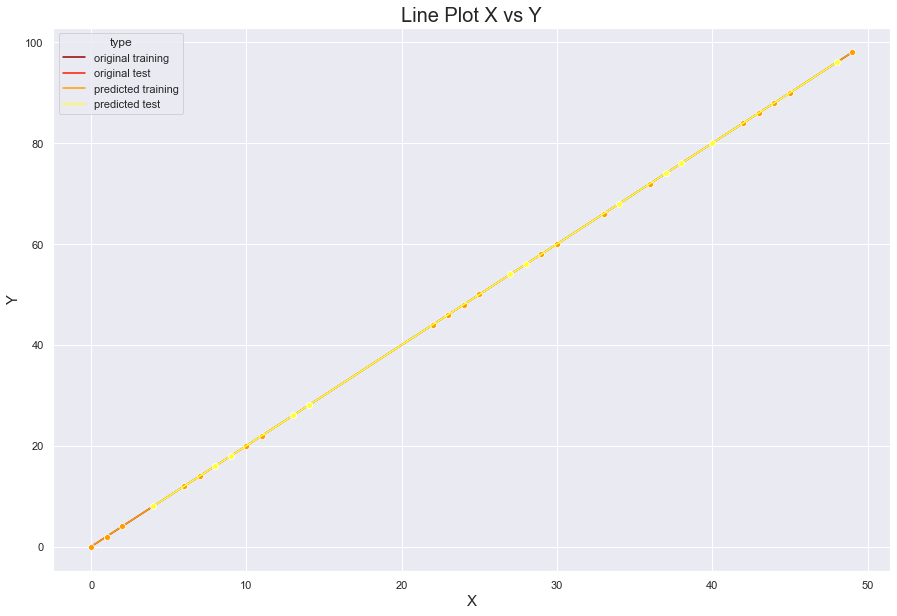

<IPython.core.display.Javascript object>

In [99]:
plot_line_graph(comp_df_merged, "X", "Y", "type")